In [21]:
import os
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm.notebook import tqdm, trange

import torch
import torchinfo

from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

from foolbox import PyTorchModel, accuracy, samples
from foolbox.attacks import FGSM, LinfPGD

from src.black_box.model import BlackBoxModel
from src.black_box.oracle import get_oracle_prediction
from src.substitute.datasets import SubstituteDataset
from src.substitute.model import SubstituteModel

# Substitute training

In [2]:
# STEP 1: Initial Collection
substitute_dataset = SubstituteDataset(
    root_dir='src/substitute/data/training_set_0', get_predictions=get_oracle_prediction
)
train_dataloader = DataLoader(substitute_dataset, batch_size=8)

# STEP 2: Architecture Selection
substitute_model = SubstituteModel()

for p in trange(6, desc='Substitute training'):
    # STEP 3: Labeling with oracle
    substitute_dataset = SubstituteDataset(
        root_dir=f'src/substitute/data/training_set_{p}',
        get_predictions=get_oracle_prediction,
    )
    train_dataloader = DataLoader(substitute_dataset, batch_size=8)

    # STEP 4: Training the substitute model
    substitute_model.train_model(train_dataloader, epochs=10)

    # STEP 5: Jacobian dataset augmentation
    substitute_model.jacobian_dataset_augmentation(
        substitute_dataset=substitute_dataset,
        p=(p + 1),
        lambda_=0.1,
        root_dir=f'src/substitute/data/training_set_{p+1}',
    )
    
    # Let's save the model at each substitute epoch p
    torch.save(substitute_model.state_dict(), f'models/substitute_model_p_{p}.pt')

    # STEP 6: ???
    # STEP 7: Profit

Substitute training:   0%|          | 0/6 [00:00<?, ?it/s]

Training:   0%|          | [00:00<?, ?epoch/s]

Epoch 0:   0%|          | [00:00<?]

Epoch 1:   0%|          | [00:00<?]

Epoch 2:   0%|          | [00:00<?]

Epoch 3:   0%|          | [00:00<?]

Epoch 4:   0%|          | [00:00<?]

Epoch 5:   0%|          | [00:00<?]

Epoch 6:   0%|          | [00:00<?]

Epoch 7:   0%|          | [00:00<?]

Epoch 8:   0%|          | [00:00<?]

Epoch 9:   0%|          | [00:00<?]

Jacobian dataset augmentation:   0%|          | 0/150 [00:00<?, ?it/s]

Training:   0%|          | [00:00<?, ?epoch/s]

Epoch 0:   0%|          | [00:00<?]

Epoch 1:   0%|          | [00:00<?]

Epoch 2:   0%|          | [00:00<?]

Epoch 3:   0%|          | [00:00<?]

Epoch 4:   0%|          | [00:00<?]

Epoch 5:   0%|          | [00:00<?]

Epoch 6:   0%|          | [00:00<?]

Epoch 7:   0%|          | [00:00<?]

Epoch 8:   0%|          | [00:00<?]

Epoch 9:   0%|          | [00:00<?]

Jacobian dataset augmentation:   0%|          | 0/300 [00:00<?, ?it/s]

Training:   0%|          | [00:00<?, ?epoch/s]

Epoch 0:   0%|          | [00:00<?]

Epoch 1:   0%|          | [00:00<?]

Epoch 2:   0%|          | [00:00<?]

Epoch 3:   0%|          | [00:00<?]

Epoch 4:   0%|          | [00:00<?]

Epoch 5:   0%|          | [00:00<?]

Epoch 6:   0%|          | [00:00<?]

Epoch 7:   0%|          | [00:00<?]

Epoch 8:   0%|          | [00:00<?]

Epoch 9:   0%|          | [00:00<?]

Jacobian dataset augmentation:   0%|          | 0/600 [00:00<?, ?it/s]

Training:   0%|          | [00:00<?, ?epoch/s]

Epoch 0:   0%|          | [00:00<?]

Epoch 1:   0%|          | [00:00<?]

Epoch 2:   0%|          | [00:00<?]

Epoch 3:   0%|          | [00:00<?]

Epoch 4:   0%|          | [00:00<?]

Epoch 5:   0%|          | [00:00<?]

Epoch 6:   0%|          | [00:00<?]

Epoch 7:   0%|          | [00:00<?]

Epoch 8:   0%|          | [00:00<?]

Epoch 9:   0%|          | [00:00<?]

Jacobian dataset augmentation:   0%|          | 0/1200 [00:00<?, ?it/s]

Training:   0%|          | [00:00<?, ?epoch/s]

Epoch 0:   0%|          | [00:00<?]

Epoch 1:   0%|          | [00:00<?]

Epoch 2:   0%|          | [00:00<?]

Epoch 3:   0%|          | [00:00<?]

Epoch 4:   0%|          | [00:00<?]

Epoch 5:   0%|          | [00:00<?]

Epoch 6:   0%|          | [00:00<?]

Epoch 7:   0%|          | [00:00<?]

Epoch 8:   0%|          | [00:00<?]

Epoch 9:   0%|          | [00:00<?]

Jacobian dataset augmentation:   0%|          | 0/2400 [00:00<?, ?it/s]

Training:   0%|          | [00:00<?, ?epoch/s]

Epoch 0:   0%|          | [00:00<?]

Epoch 1:   0%|          | [00:00<?]

Epoch 2:   0%|          | [00:00<?]

Epoch 3:   0%|          | [00:00<?]

Epoch 4:   0%|          | [00:00<?]

Epoch 5:   0%|          | [00:00<?]

Epoch 6:   0%|          | [00:00<?]

Epoch 7:   0%|          | [00:00<?]

Epoch 8:   0%|          | [00:00<?]

Epoch 9:   0%|          | [00:00<?]

Jacobian dataset augmentation:   0%|          | 0/4800 [00:00<?, ?it/s]

In [13]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

mnist_test = MNIST(
    root='src/black_box/data', train=False, download=True, transform=transform
)

dataloader_test = DataLoader(mnist_test, batch_size=8)

acc = []
for (images, labels) in tqdm(dataloader_test):
    predictions = substitute_model(images).softmax(dim=-1).argmax(dim=-1)

    acc.append((predictions == labels).sum().item() / len(labels))

print(f'Accuracy {np.mean(acc)}')

  0%|          | 0/1250 [00:00<?, ?it/s]

Accuracy 0.6447


And let's save the model.

# Attacks

In [7]:
substitute_model = SubstituteModel()
substitute_model.load_state_dict(torch.load('models/substitute_model.pt'))
substitute_model.eval()

SubstituteModel(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=36864, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [15]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

mnist_test = MNIST(
    root='src/black_box/data', train=False, download=True, transform=transform
)

indices = [i for i in range(5000)]
images = torch.stack([mnist_test.__getitem__(i)[0] for i in indices])
labels = torch.tensor([mnist_test.__getitem__(i)[1] for i in indices])

preprocessing = dict(mean=[0.1307], std=[0.3081], axis=-3)
fmodel = PyTorchModel(substitute_model, bounds=(0, 1), preprocessing=preprocessing)

attack = FGSM()
epsilons = [0.00, 0.05, 0.20, 0.25, 0.30]

raw_advs, clipped_advs, success = attack(fmodel, images, labels, epsilons=epsilons)

Accuracy for ε=0.0: 98.72


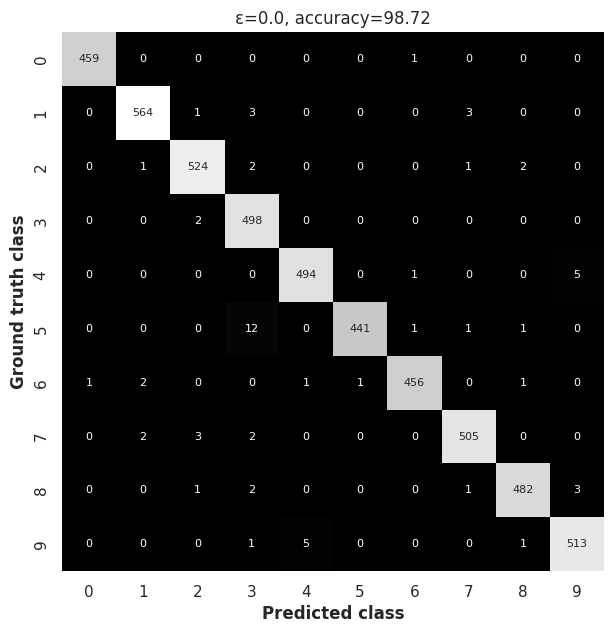

Accuracy for ε=0.05: 98.50


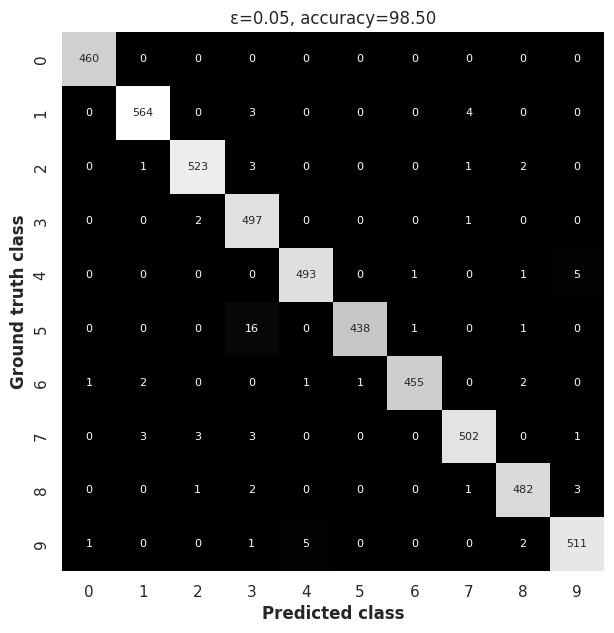

Accuracy for ε=0.2: 87.46


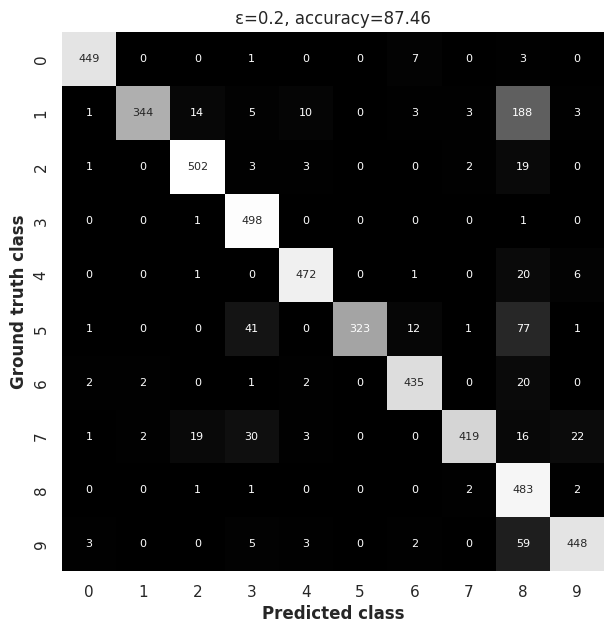

Accuracy for ε=0.25: 73.14


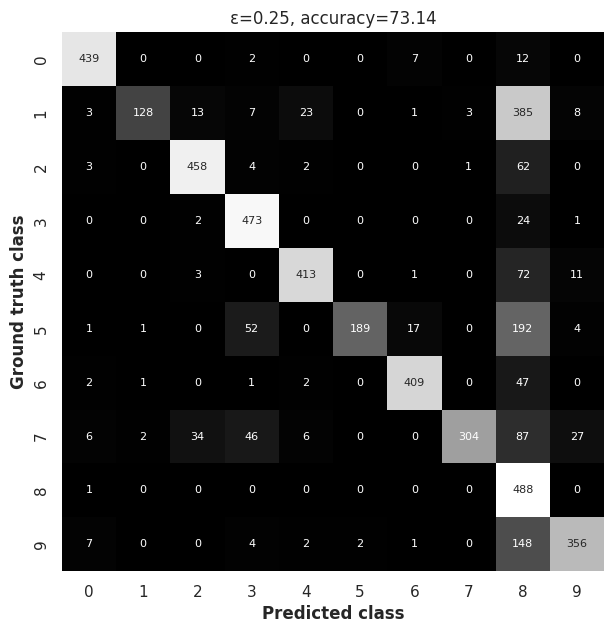

Accuracy for ε=0.3: 54.40


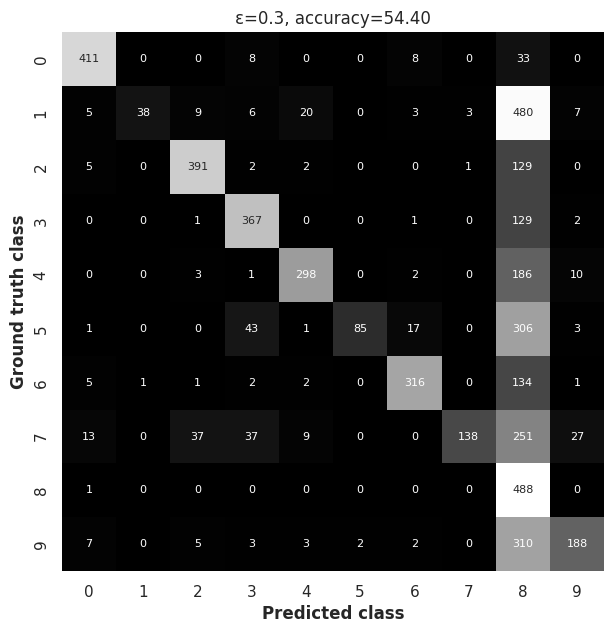

In [22]:
tranform_normalize = transforms.Normalize(mean=(0.1307,), std=(0.3081,))

for (i, epsilon) in enumerate(epsilons):
    y_true, y_pred = [], []
    for (label, image_adversarial) in zip(labels, raw_advs[i]):
        prediction = get_oracle_prediction(
            tranform_normalize(image_adversarial).unsqueeze(dim=0)
        )

        y_true.append(label.item())
        y_pred.append(prediction.item())

    #     if prediction_image != prediction_image_adversarial:
    #         fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
    #         ax0.imshow(image.permute(1,2,0), cmap='gray')
    #         ax0.set_title(prediction.item())

    #         ax1.imshow(image_adversarial.permute(1,2,0), cmap='gray')
    #         ax1.set_title(prediction_adversarial.item())

    print(f'Accuracy for ε={epsilon}: {100 * accuracy_score(y_true, y_pred):.2f}')
    
    df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), range(10), range(10))
    plt.figure(figsize=(7,7))
    sns.set(font_scale=1.0)  # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cbar=False, cmap='gray', fmt='0.0f')  # font size
    
    plt.xlabel('Predicted class', fontweight='bold')
    plt.ylabel('Ground truth class', fontweight='bold')
    plt.title(f'ε={epsilon}, accuracy={100 * accuracy_score(y_true, y_pred):.2f}')
    

    plt.show()